# **Lab: Week #20 | Quantum Teleportation**
---

### **Description**:
In this week's lab, we will implement the Quantum Teleportation protocol using Qiskit. The goals of this are three-fold:
1. It is one of the most fundamental Quantum Protocols and good for anyone in the field to be familiar with.

2. It will be valuable when discussing Quantum Networking in a few weeks.

3. This is a good chance to refresh your knowledge of coding quantum circuits in Qiskit.


---

## **Part 0: Importing from Qiskit**
---

**Run the code below to import everything needed for this lab.**

In [1]:
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector, partial_trace

import warnings
warnings.filterwarnings('ignore')

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## **Part 1: Implementing Quantum Teleportation**
---

In this section, we will work together to implement Quantum Teleportation.

### **Step 1: Alice and Bob share a Bell pair and go their separate ways.**

**Together**, let's create a circuit as follows:
* It has one qubit to be teleported, one for Alice, and one for Bob.
* It has one classical bit for each qubit measurement.
* Creates a Bell state with Alice's and Bob's qubits.

<br>

**NOTE**: The `barrier()` command added below just adds a line to the drawing at that point in the circuit. This will be provided for each step to make the circuit easier to interpret.

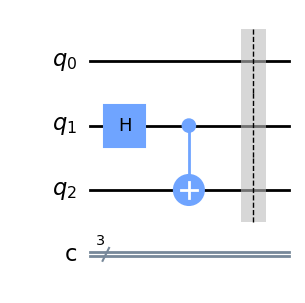

In [13]:
# CREATE CIRCUIT HERE
qc = QuantumCircuit(3,3)

qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.draw()

### **Step 2. Alice prepares a special state to teleport to Bob.**

Prepare the teleportation qubit in the $|1\rangle$ state.

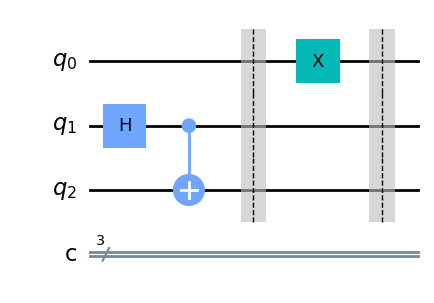

In [14]:
# PREPARE THE |1> STATE
qc.x(0)

qc.barrier()
qc.draw()

### **Step 3. Alice measures her half of the Bell pair and her special state in the “Bell basis”.**

Add the following to the quantum circuit:
* A CX gate applied to the teleportation and Alice's qubits.
* An H gate applied to the teleportation qubit.
* A measurement of the teleportation and Alice's qubits.

<br>

**NOTE**: We have added the parameter `cregbundle = False` to the `draw(...)` command so that we can see which classical bits are storing the measurement.

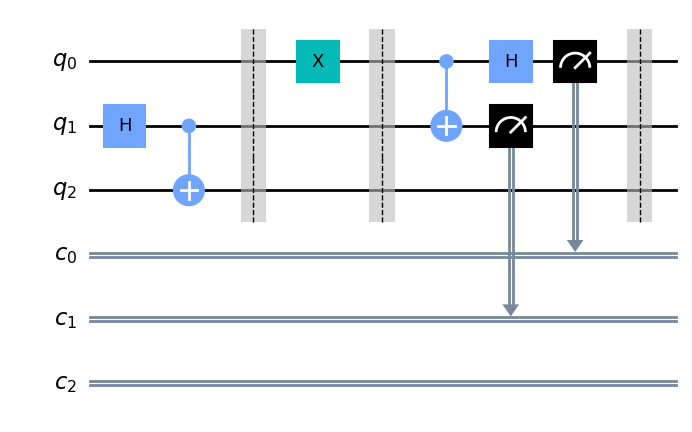

In [15]:
# ADD TO CIRCUIT HERE
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.barrier()
qc.draw(cregbundle = False)

---

### **Step 4. Alice sends Bob her measurement results over a classical channel.**

---

### **Steps 5. Bob adjusts his half of the Bell pair based on Alice’s measurement results.**

Add the following to the quantum circuit:
* An X gate applied to Bob's qubit *if* the result of measuring Alice's qubit was 1.
* A Z gate applied to Bob's qubit *if* the result of measuring the teleportation qubit was 1.
* A measurement of Bob's qubit.

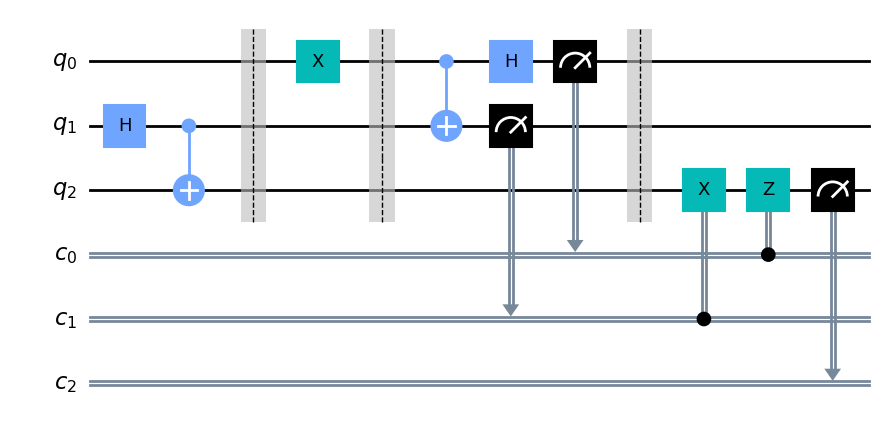

In [16]:
qc.x(2).c_if(qc.clbits[1], 1)
qc.z(2).c_if(qc.clbits[0], 1)# COMPLETE THIS LINE

# MEASURE BOB'S QUBIT
qc.measure(2,2)
qc.draw(cregbundle = False)

### **Simulating Quantum Teleportation**

We will do this in two parts:
1. Simulate our circuit as usual and plot the histogram of results.
2. Estimate only Bob's state, getting rid of Alice's states, from the measurement results. 

#### **1. Simulate our circuit as usual and plot the histogram of results.**

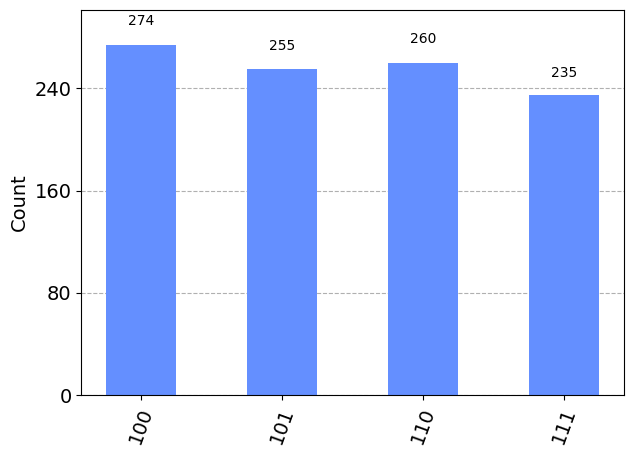

In [17]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

#### **2. Estimate only Bob's state, getting rid of Alice's states, from the measurement results.**

In [18]:
bob_state = [0, 0]
for state in result.get_counts().keys():
  bob_state[int(state[0])] += result.get_counts()[state]

norm = (sum(c**2 for c in bob_state))**(1/2)
bob_state = [c / norm for c in bob_state]

statevector = Statevector(bob_state)

statevector.draw(output = 'latex')

<IPython.core.display.Latex object>

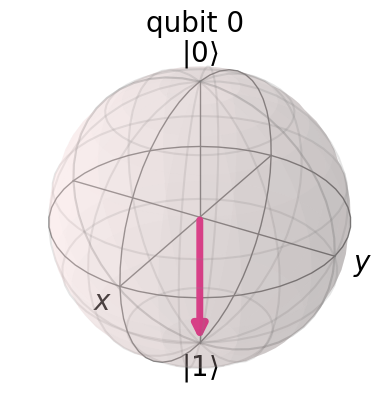

In [19]:
statevector.draw(output = 'bloch')

## **Part 2: Quantum Teleportation in Full**
---

The full Quantum Teleportation protocol implementation and simulation is given in the 2 cells below. Complete the exercises based on these 2 cells.

<br>


**NOTE**: Step #2 has been modified to allow for more experimentation. Specifically, we have introduced the `prepare_state(...)` function that allows us to prepare any *valid* quantum state to teleport without having to add the gates ourselves.

#### **Create and Draw Teleportation Circuit.**

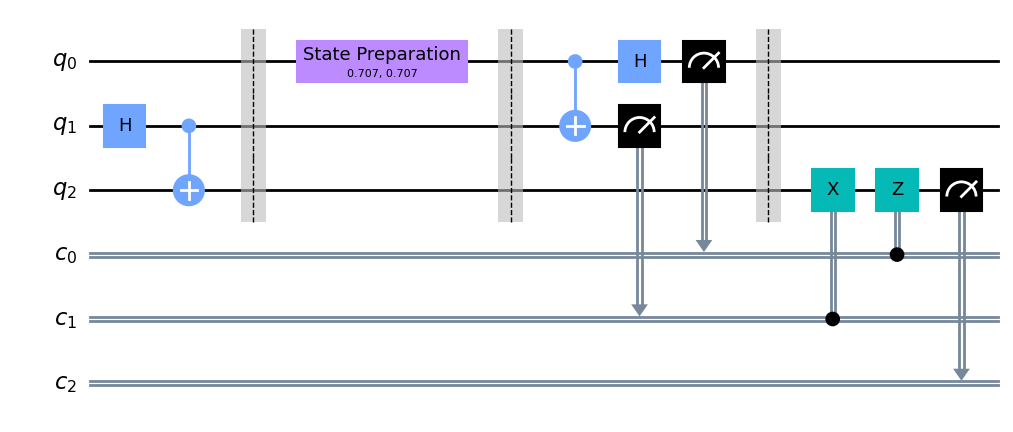

In [20]:
#=========
# STEP #1
#=========
qc = QuantumCircuit(3, 3)

qc.h(1)
qc.cx(1, 2)

qc.barrier()


#=========
# STEP #2
#=========
amplitude_0 = (0.5)**(1/2)
qc.prepare_state([amplitude_0, (1 - amplitude_0**2)**(1/2)], 0)

qc.barrier()


#=========
# STEP #3
#=========
qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])

qc.barrier()

qc.draw(cregbundle = False)


#=============
# STEPS #4 - 5
#=============
qc.x(2).c_if(qc.clbits[1], 1)
qc.z(2).c_if(qc.clbits[0], 1)

qc.measure(2, 2)

qc.draw(cregbundle = False)

#### **Simulate Teleportation and Reconstruct Bob's State.**

In [21]:
# SIMULATE
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

result = job.result()
counts = result.get_counts()


# RECONSTRUCT Bob's state from the measurement results
bob_state = [0, 0]
for state in result.get_counts().keys():
  bob_state[int(state[0])] += result.get_counts()[state]

norm = (sum(c**2 for c in bob_state))**(1/2)
bob_state = [c / norm for c in bob_state]

statevector = Statevector(bob_state)

statevector.draw(output = 'latex')

<IPython.core.display.Latex object>

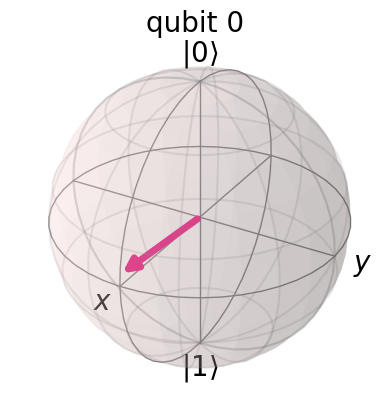

In [22]:
statevector.draw(output = 'bloch')

### **Exercise #1**

Modify the code above to teleport the $|+\rangle$ state.

### **Exercise #2**

Modify the code above to teleport the $|-\rangle$ state.

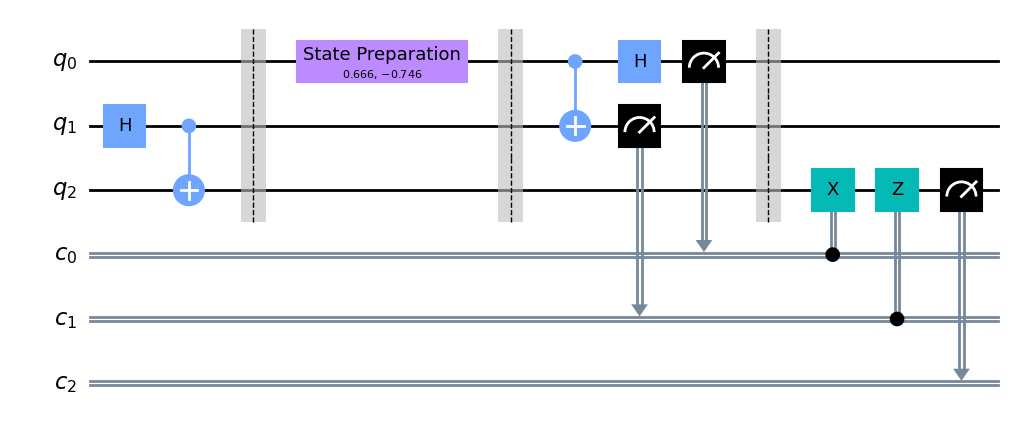

In [44]:
#=========
# STEP #1
#=========
qc = QuantumCircuit(3, 3)

qc.h(1)
qc.cx(1, 2)

qc.barrier()


#=========
# STEP #2
#=========
amplitude_0 = (0.444)**(1/2)
qc.prepare_state([amplitude_0, -(1 - amplitude_0**2)**(1/2)], 0)

qc.barrier()


#=========
# STEP #3
#=========
qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])

qc.barrier()

qc.draw(cregbundle = False)


#=============
# STEPS #4 - 5
#=============
qc.x(2).c_if(qc.clbits[0], 1)
qc.z(2).c_if(qc.clbits[1], 1)

qc.measure(2, 2)

qc.draw(cregbundle = False)

In [45]:
# SIMULATE
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

result = job.result()
counts = result.get_counts()


# RECONSTRUCT Bob's state from the measurement results
bob_state = [0, 0]
for state in result.get_counts().keys():
  bob_state[int(state[0])] += result.get_counts()[state]

norm = (sum(c**2 for c in bob_state))**(1/2)
bob_state = [c / norm for c in bob_state]

statevector = Statevector(bob_state)

statevector.draw(output = 'latex')

<IPython.core.display.Latex object>

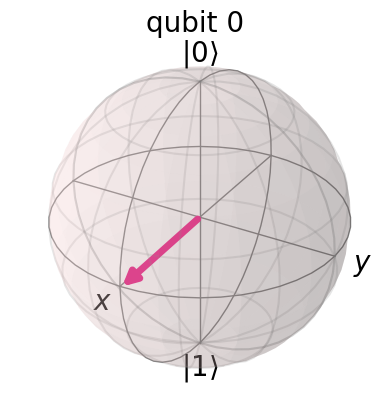

In [46]:
statevector.draw(output = 'bloch')



**Exercise #3**

Notice that the current way of reconstructing Bob's state from measurement results cannot identify the negative sign in Exercise #2 and thinks this is a $|+\rangle$ state. Try telporting a different state with a minus sign (a phase difference to be technical) and see if you get a similar result.

<br>

**NOTE**: This is the exact approach Bob would have to take in a real laboratory, so this is a real problem if we want to uncover the state being teleported.

### **Exercise #4**

Change the order of Bob's X and Z gates in Step #5 and rerun the protocol. What happens to the results? Does the order of these gates matter?

### **Open Ended Exercises**

To hone your understanding further, 
* Run the protocol after changing one of the gates to see what effect it has on the results. 
* Run the protocol after changing multiple gates at the same time.
* Add code at the end to calculate how close the final measured state and the intended state are from each other. *This is very challenging!*

# End of Lab

---

© 2023 The Coding School, All rights reserved